In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
from tqdm import tqdm

In [2]:
from sklearn.model_selection import train_test_split  ,GridSearchCV 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


In [3]:
files = sorted(os.listdir('./Speech Recordings/'))

In [4]:
librosa.load('Speech Recordings\Arnav_E_1.m4a' ,sr=None)


C:\Users\KHADGA JYOTH ALLI\AppData\Local\Temp\ipykernel_2124\111769094.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  librosa.load('Speech Recordings\Arnav_E_1.m4a' ,sr=None)
c:\Users\KHADGA JYOTH ALLI\.conda\envs\gpu\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(array([0.        , 0.        , 0.        , ..., 0.00482178, 0.00439453,
        0.00418091], dtype=float32),
 32000)

In [5]:
import torchaudio
torchaudio.load('Speech Recordings\Arnav_E_1.m4a')

(tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0048, 0.0044, 0.0042]]), 32000)

In [6]:
df = {
    'file':[],
    'y':[],
    'sr':[],
    'class':[],
}
for file in tqdm(files):
    class_name = file.split('.')[0].split('_')[0]
    # print(class_name,file)
    y, sr  = librosa.load('./Speech Recordings/' + file)
    df['file'].append(file)
    df['y'].append(y)
    df['sr'].append(sr)
    df['class'].append(class_name)
    # break 
df = pd.DataFrame(df)

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\KHADGA JYOTH ALLI\AppData\Local\Temp\ipykernel_2124\1478392371.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr  = librosa.load('./Speech Recordings/' + file)
c:\Users\KHADGA JYOTH ALLI\.conda\envs\gpu\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
100%|██████████| 50/50 [00:03<00:00, 14.15it/s]


In [7]:
df.head()

,file,y,sr,class
0,Arnav_E_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav
1,Arnav_E_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav
2,Arnav_E_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav
3,Arnav_E_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav
4,Arnav_E_5.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav


In [8]:
df['targets'] = LabelEncoder().fit_transform(df['class'])

In [9]:
df

,file,y,sr,class,targets
0,Arnav_E_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,0
1,Arnav_E_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,0
2,Arnav_E_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,0
3,Arnav_E_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,0
4,Arnav_E_5.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,0
5,Arnav_M_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,0
6,Arnav_M_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,0
7,Arnav_M_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,0
8,Arnav_M_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,0
9,Arnav_M_5.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,0


In [10]:
df['class'].unique()

array(['Arnav', 'Datta', 'Jyothi', 'Kushal', 'Nachiketa'], dtype=object)

In [11]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

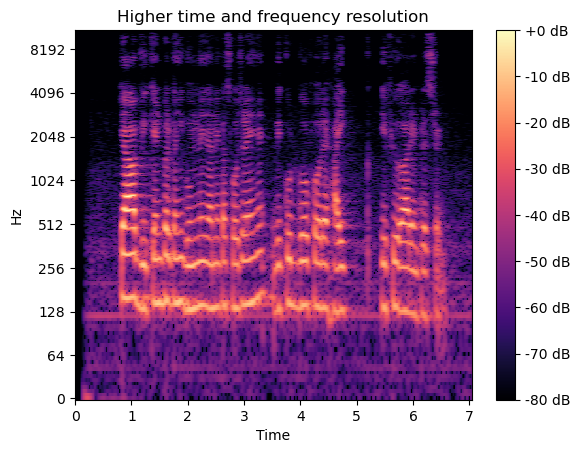

In [12]:
fig, ax = plt.subplots()
D_highres = librosa.stft(y, hop_length=256, n_fft=4096)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)
ax.set(title='Higher time and frequency resolution')
fig.colorbar(img, ax=ax, format="%+2.f dB")

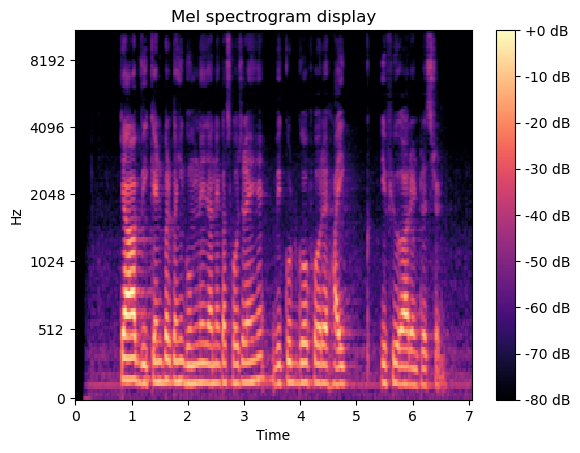

In [13]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [14]:
def train_model(df,n_mfcc = 40,n_fft = 2048):

    X = []
    max_length = 0
    for sig, fs in df[['y','sr']].values:
        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft)
        mfccs_scaled = np.mean(mfccs.T,axis=0)
        X.append(mfccs_scaled)



    X_train, X_test, y_train, y_test = train_test_split(X,df.targets.values,random_state=5,shuffle=True,test_size=0.3,stratify=df.targets.values)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print("Number of Features: ",n_mfcc)
    print("Number of FFT samples: ",n_fft)
    
    print(f"train size: {len(X_train)}, test size: {len(X_test)}") 

    clf_params =  {
                    'C':(0.2,0.8,2,4,30),
                    'kernel':('linear','rbf','poly','sigmoid'),
                    'decision_function_shape' : ['ovo', 'ovr'],
                    'degree':np.arange(3,5,1)
                    }

    model = SVC(probability=True)

    grid = GridSearchCV(model,clf_params,scoring='f1_macro',cv=4,n_jobs=-1)
    
    
    print("Using Model : ",model.__class__.__name__)
    


    grid.fit(X_train,y_train)
    y_pred = grid.predict(X_test)
    pred_prob = grid.predict_proba(X_test)
    print(pred_prob.shape)

    
    print("Best Parameters: ",grid.best_params_)


    matrix = confusion_matrix(y_test, y_pred)
    print('Class wise Accuracy Score : ', matrix.diagonal()/matrix.sum(axis=1))
    print('Class wise roc_auc score: ',roc_auc_score(y_test,pred_prob,multi_class='ovr',average=None))

    print("Classification Report: \n\n")
    print(classification_report(y_test,y_pred,target_names=df['class'].unique()))


    fpr = {}
    tpr = {}
    thresh ={}
    n_class = df.targets.nunique()

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
        plt.plot(fpr[i], tpr[i], label = f'{i} vs rest',color = np.random.choice(['r','g','b','y','c','m','k']))
    plt.legend()
    plt.title("AUC-ROC Curve")
    plt.show()
    return grid

Number of Features:  50
Number of FFT samples:  512
train size: 35, test size: 15
Using Model :  SVC
(15, 5)
Best Parameters:  {'C': 0.2, 'decision_function_shape': 'ovo', 'degree': 3, 'kernel': 'linear'}
Class wise Accuracy Score :  [0. 0. 0. 0. 1.]
Class wise roc_auc score:  [0.5 0.5 0.5 0.5 0.5]
Classification Report: 


              precision    recall  f1-score   support

       Arnav       0.00      0.00      0.00         3
       Datta       0.00      0.00      0.00         3
      Jyothi       0.00      0.00      0.00         3
      Kushal       0.00      0.00      0.00         3
   Nachiketa       0.20      1.00      0.33         3

    accuracy                           0.20        15
   macro avg       0.04      0.20      0.07        15
weighted avg       0.04      0.20      0.07        15



c:\Users\KHADGA JYOTH ALLI\.conda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KHADGA JYOTH ALLI\.conda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KHADGA JYOTH ALLI\.conda\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

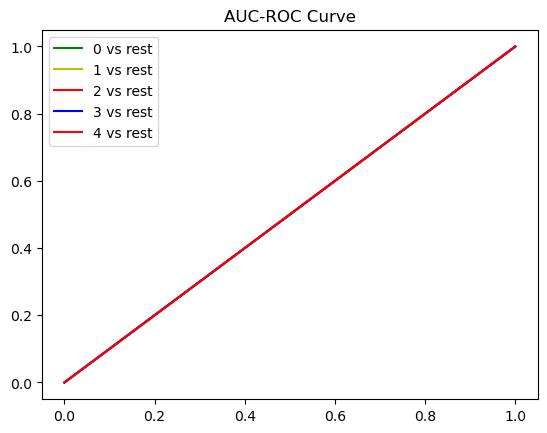

In [15]:
gd = train_model(df,n_mfcc = 50,n_fft = 512)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA 
from sklearn.feature_selection import (RFE, SelectKBest, 
                                       SelectPercentile,RFECV)
import sklearn

def Classification(X_train, X_test, y_train, y_test,data,name:str,Gridsearch = False,nsplits=10):
    try:
        y_train = y_train.values.ravel()
        y_test = y_test.values.ravel()
    except:
        pass
    
    classifiers = [
    KNeighborsClassifier(),
    LogisticRegression()
    ]
    if Gridsearch ==True:
        clf_parameters = [
            {
                "clf__n_neighbors": np.arange(2,25 ,1),
                "clf__metric": ["cityblock","cosine","euclidean","l1","l2","manhattan","nan_euclidean",],
                "clf__weights": ["uniform", "distance"],
                "clf__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
         },
        {
                "clf__C": np.logspace(-2, -1.5, 30),
                "clf__penalty": ["l1", "l2", "elasticnet", "none"],
                "clf__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
        }
         ]
    else:
        clf_parameters = [{},{}]
    data[name] = {'Model':[],'Accuracy' :[],'f1_micro' :[],'f1_macro' :[]}
    dataint = {'Model':[],'Accuracy' :[],'f1_micro' :[],'f1_macro' :[]}
    
    i=1
    for classifier,clf_params in zip(classifiers,clf_parameters):
        pipe = Pipeline(steps=[('clf', classifier)])
        grid = GridSearchCV(pipe,clf_params,scoring='f1_macro',cv=nsplits,n_jobs=-1)  
        try:
            grid.fit(X_train, y_train)   
            pred = grid.predict(X_test)
            print("_"*32)
            print(f'{i}.',classifier)
            print("_"*32)
            print(grid.best_params_)
            print(classification_report(y_test, pred))
            i+=1
            i1 = classifier.__class__.__name__
            i2 = sklearn.metrics.accuracy_score(y_test,pred)
            i3 = sklearn.metrics.f1_score(y_test,pred,average='micro')
            i4 = sklearn.metrics.f1_score(y_test,pred,average='macro')
            dataint['Model'].append(i1)
            dataint['Accuracy'].append(i2)
            dataint['f1_micro'].append(i3)
            dataint['f1_macro'].append(i4)
            print("-"*80)
            print("-"*80)
            
        except Exception as e: print(e)
    classifiers = [
        DecisionTreeClassifier(),    
        SVC(), 
        NuSVC(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        SGDClassifier()
        ]
    base_estimators = classifiers
    if Gridsearch==True:
        clf_parameters = [
                          {
                'clf__criterion' : ["gini", "entropy"], 
            'clf__max_features':['sqrt', 'log2',None],
        #             'max_depth':np.linspace(140,190,10),
                    'clf__ccp_alpha':np.logspace(-3,-2,20),#np.logspace(-2.32,-2.3,20),
            "clf__max_leaf_nodes" : [None]+np.arange(30,40,5).tolist(),

            "clf__splitter" : ["best", "random"],
            "clf__min_samples_split":np.arange(2,50,10)
        },


            {
                    'clf__C':(0.8,2,30),
                    'clf__kernel':('linear','rbf','poly','sigmoid'),
                    'clf__decision_function_shape' : ['ovo', 'ovr'],
                    'clf__degree':np.arange(3,5,1)
                    },
            {
                'clf__nu': np.logspace(-1.15,-1.23,5),#np.logspace(-2,-1,30)
             'clf__kernel' : ['linear', 'poly', 'rbf', 'sigmoid' ]   ,
                'clf__gamma' : ['scale', 'auto'],
                'clf__degree':np.arange(3,5,1),
                'clf__decision_function_shape' : ['ovo', 'ovr'],
            },
            {
                 'clf__n_estimators': [150,200,250],
            'clf__max_features': ['sqrt', 'log2',None],
            'clf__max_depth' : [None],#np.arange(4,15,2).tolist(),
            'clf__criterion' :['gini', 'entropy']   ,
                'clf__bootstrap' :[True],
        #         'clf__ccp_alpha':np.logspace(-2,1,10)
            },
            {
                'clf__estimator':[RandomForestClassifier(),DecisionTreeClassifier(criterion='entropy'),SVC(),LogisticRegression(**{'C': 0.017433288221999882, 'penalty': 'l2', 'solver': 'newton-cg'})],
                'clf__algorithm' : ['SAMME', 'SAMME.R'],
                'clf__n_estimators': [50,100]
            },
            {
              'clf__loss' :['log_loss', 'exponential'],
                'clf__criterion' : ['friedman_mse', 'squared_error'],
                'clf__max_features' : [ 'sqrt', 'log2'],
                'clf__learning_rate': np.logspace(-1,1,5),
                'clf__n_estimators':np.arange(100,1000,200)

            },
            {
                'clf__loss' :['hinge', 'log_loss', 'modified_huber','squared_hinge', 'perceptron'],
                'clf__penalty' : ['l2', 'l1', 'elasticnet'], 
                'clf__alpha' : np.logspace(-4,-2,30),
                'clf__learning_rate' :[ 'constant','optimal','invscaling','adaptive'],
            }
            ]
    else:
        clf_parameters = [{}]*len(classifiers)
    for classifier,clf_params in zip(classifiers,clf_parameters):
        pipe = Pipeline(steps=[('standardscaler', StandardScaler()),('clf', classifier)])
        grid = GridSearchCV(pipe,clf_params,scoring='f1_macro',cv=nsplits,n_jobs=-1)  
        try:
            grid.fit(X_train, y_train)   
            pred = grid.predict(X_test)
            print("_"*32)
            print(f'{i}.',classifier)
            print("_"*32)
            print(grid.best_params_)
            print(classification_report(y_test, pred))
            i=i+1
            i1 = classifier.__class__.__name__
            i2 = sklearn.metrics.accuracy_score(y_test,pred)
            i3 = sklearn.metrics.f1_score(y_test,pred,average='micro')
            i4 = sklearn.metrics.f1_score(y_test,pred,average='macro')
            dataint['Model'].append(i1)
            dataint['Accuracy'].append(i2)
            dataint['f1_micro'].append(i3)
            dataint['f1_macro'].append(i4)
            print("-"*80)
            print("-"*80)
            
        except Exception as e: print(e)
    
    
    classifiers = [
    GaussianNB(),
    MultinomialNB()
    ]
    if Gridsearch==True:
        clf_parameters = [
            {
            'clf__var_smoothing':np.logspace(-20,-10,10)
            },
            {
                'clf__alpha':[0] + np.logspace(-2,5,5).tolist(),
                'clf__fit_prior':[True,False]
            }
             ]
    else:
        clf_parameters = [{}]*len(classifiers)

    for classifier,clf_params in zip(classifiers,clf_parameters):
        pipe = Pipeline(steps=[('minmaxscalar',MinMaxScaler()),('clf', classifier)])
        grid = GridSearchCV(pipe,clf_params,scoring='f1_macro',cv=nsplits,n_jobs=-1)  
        try:
            grid.fit(X_train, y_train)   
            pred = grid.predict(X_test)
            print("_"*32)
            print(f'{i}.',classifier)
            print("_"*32)
            print(grid.best_params_)
            print(classification_report(y_test, pred))
            i=i+1
            i1 = classifier.__class__.__name__
            i2 = sklearn.metrics.accuracy_score(y_test,pred)
            i3 = sklearn.metrics.f1_score(y_test,pred,average='micro')
            i4 = sklearn.metrics.f1_score(y_test,pred,average='macro')
            dataint['Model'].append(i1)
            dataint['Accuracy'].append(i2)
            dataint['f1_micro'].append(i3)
            dataint['f1_macro'].append(i4)
            print("-"*80)
            print("-"*80)
            
        except Exception as e: print(e)
            
    data[name] = dataint
#     print(dataint)

In [83]:
n_mfcc = 100
n_fft = 512
X = []
max_length = 0
for sig, fs in df[['y','sr']].values:
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft,hop_length=512)
    mfccs_scaled = np.mean(mfccs.T,axis=0)
    X.append(mfccs_scaled)



X_train, X_test, y_train, y_test = train_test_split(X,df.targets.values,random_state=5,shuffle=True,test_size=0.3,stratify=df.targets.values)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
data_GS = {}
Classification(X_train, X_test, y_train, y_test,data_GS,'Raw_GS',Gridsearch=True,nsplits=5)

________________________________
1. KNeighborsClassifier()
________________________________
{'clf__algorithm': 'auto', 'clf__metric': 'cosine', 'clf__n_neighbors': 12, 'clf__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.20      1.00      0.33         3

    accuracy                           0.20        15
   macro avg       0.04      0.20      0.07        15
weighted avg       0.04      0.20      0.07        15

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
________________________________
2. LogisticRegression()
________________________________
{'clf__C': 0.015475873545578892, 'clf__penalty': 'l1', 'clf__sol

KeyboardInterrupt: 